# Stoneburner, Kurt #
- ## DSC 550 - Week 07
- ## Milestone #2

### Current Project Goals: ###
**Primary Goal**: Model Racial COVID numbers at the county level. California provides racial data at the State Level. I demonstrated in Milestone 1 (albeit awkwardly) that there are significant disparities in COVID prevalence between California Counties. There is also an unequal distribution of COVID amongst racial categories across California. My goal is to look at the intersection between county racial populations and total county COVID cases. My initial observation is counties with a high percentage of Latino population also have high rates of COVID infection. Example: Imperial county has the highest rate of COVID infections (nearly 15% of the population), with a population comprised of 85% Latinos.

**Secondary Goal**: Can I build a model to predict future COVID cases at some interval (7,14,30 days) based on cases and racial makeup of individual counties, along with data from surrounding counties? I would likely build this estimation based on death data. Deaths represent a small sub-set of COVID cases but are generally easier to attribute to COVID. When considering COVID prevalence it's important to consider the numbers are based on testing. The actual COVID infection rates will be higher than the official numbers since not everyone with COVID will be tested. Whereas, it is expected that a very high percentage of COVID deaths will be reported. COVID deaths generally represent COVID infections from 14-21 days prior.

**Is my Primary goal of modeling Racial values at the county level enough to satisfy the requirements of this project? Or will I need to do more?**

### Data Sources: ###
**U.S. Census - County Population Characteristics: 2010-2019**
    
   - Website: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-detail.html

   - Data Direct Download: https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/cc-est2019-alldata-06.csv

**State of California, Open Data Portal**

   - Website: https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state

   - Daily COVID values by county: https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a/download/covid19cases_test.csv

   - Daily Statewide Race COVID values: https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/e2c6a86b-d269-4ce1-b484-570353265183/download/covid19casesdemographics.csv

### Data Cleaning and Attributes ###

##### U.S. Census Data #####
U.S. Census Data records racial and ethnic differently than the California. Care has been taken to properly label the U.S. Census data to match the California values. Notably, the Census Bureau treats Hispanic (Latino) as an ethnicity not a race. Hispanic is treated as an additional attribute, meaning an individual identifies as a race (White, Black, Multiracial) and as Hispanic or Not-Hispanic. California treats Hispanic as a race. In order to properly count Latinos to match the values in California, the attributes for all hispanics are counted, 'H_MALE', 'H_FEMALE'. The rest of the races are counted as Non-Hispanic race (ie non-hispanic White, non-hispanic Black, non-hispanic Asian.)

The Census provided the following fields:
SUMLEV 	STATE 	COUNTY 	STNAME 	CTYNAME 	YEAR 	AGEGRP 	TOT_POP 	TOT_MALE 	TOT_FEMALE 	WA_MALE 	WA_FEMALE 	BA_MALE 	BA_FEMALE 	IA_MALE 	IA_FEMALE 	AA_MALE 	AA_FEMALE 	NA_MALE 	NA_FEMALE 	TOM_MALE 	TOM_FEMALE 	WAC_MALE 	WAC_FEMALE 	BAC_MALE 	BAC_FEMALE 	IAC_MALE 	IAC_FEMALE 	AAC_MALE 	AAC_FEMALE 	NAC_MALE 	NAC_FEMALE 	NH_MALE 	NH_FEMALE 	NHWA_MALE 	NHWA_FEMALE 	NHBA_MALE 	NHBA_FEMALE 	NHIA_MALE 	NHIA_FEMALE 	NHAA_MALE 	NHAA_FEMALE 	NHNA_MALE 	NHNA_FEMALE 	NHTOM_MALE 	NHTOM_FEMALE 	NHWAC_MALE 	NHWAC_FEMALE 	NHBAC_MALE 	NHBAC_FEMALE 	NHIAC_MALE 	NHIAC_FEMALE 	NHAAC_MALE 	NHAAC_FEMALE 	NHNAC_MALE 	NHNAC_FEMALE 	H_MALE 	H_FEMALE 	HWA_MALE 	HWA_FEMALE 	HBA_MALE 	HBA_FEMALE 	HIA_MALE 	HIA_FEMALE 	HAA_MALE 	HAA_FEMALE 	HNA_MALE 	HNA_FEMALE 	HTOM_MALE 	HTOM_FEMALE 	HWAC_MALE 	HWAC_FEMALE 	HBAC_MALE 	HBAC_FEMALE 	HIAC_MALE 	HIAC_FEMALE 	HAAC_MALE 	HAAC_FEMALE 	HNAC_MALE 	HNAC_FEMALE

These were featured engineered into the following attributes: **county  population   Latino    White    Asian   Black  Native  Hawaiian  Multiracial**

##### California Daily COVID Data by County #####
There are 58 counties in California. The dataset provided data on 61 counties. The additional counties were 'Out of State', 'Unknown', and 'California'. The counties labeled as Unknown and Out of State are beyond the scope of this project and were filtered out. The California county represents the daily statewide totals, this was filtered out as well. 

The remaining data is presented by date and by county with the following attributes: area_type, population, positive_tests, total_cases, reported_cases, deaths, reported_deaths, reported_tests, total_tests.

The most notable attributes are the value vs reported_value (total_cases vs reported_cases). The difference between value and reported_value is when the data was reported. The reported_values were the data as they were reported. These tended to be released irregularly and reflect the delay between testing and reporting. For example: if an individual reported as a positive on 2/6/21 but the test was performed on 2/1/21 the individual would be counted as a case on 2/1/21 and a reported_case on 2/6/21. It highlights the information disparities at the time especially as resources were strained as the pandemic unfolded.

The project is initially looking at the relationship between State and County Values, the actual values will be used. The reported values are useful when looking to build a predictive model based on the best information at a specific time interval. With this in mind: positive_tests, reported_cases, reported_deaths, and reported_tests are dropped.

Area_type is used to designate whether a county is an actual county of if it's 'Out of State', 'Unknown', and 'California'. These values are filtered out, therefore this attribute can be removed.

The Population attribute was removed as well, this value will be replaced with the Federal Census value from 2019 to maintain consistency of population data.

Once Cleaned this table consists of: Date, County, Cases, Deaths, tests

These attributes represent new values reported for that day. The State has stopped reporting cumulative totals. The most important data to the State is the current level of active COVID infections. 
 
##### California Racial COVID Data #####
The racial dataset included gender and age breakdowns as well as racial COVID counts. The gender and age data will be filtered out. This could be a future source of study but I'm not presently prepared to handle this level of dimensionality.

There was some additional cleaning to get the attributes properly renamed for consistency across the dataset:
 - Native Hawaiian and other Pacific Islander renamed to Hawaiian
 - Multi-Race renamed to Multiracial 
 - American Indian or Alaska Native renamed to Native
 
The attribute demographic_category was dropped since the age and sex data had been filtered out

### Merging and Scaling ###
The U.S. Census data is merged with the daily COVID dataset. Each county value now has a Total population attribute along with estimated racial populations for Latino, White, Asian, Black, Native, Hawaiian, Multiracial.

To measure COVID prevalence amongst counties with a wide variance in population the data is converted into values per 100,000 population. This is the same measure the State of California uses to measure prevalence. The numbers get a little weird for counties with a population of less than 100,000. Considering California has a population of 40 million. It feels appropriate to drop these less populated countis. I might also consider shifting the rate to values per 10,000. But i'm going to stick witrh 100,000 convention for now. 

To Calculate this value. The Total Population (and Racial populations) are divided by 100,000. This provides populations in terms of per 100,000. For example, Alameda county has a population 1.61 million people. This is represented as a population 16.1/100k. The values of Cases, Deaths, and tests are divided by the 100k population. Example: 220 new Alameda cases is divided by 16.1 which results in 13.75 cases per 100,000 people.

This leaves two working datasets of Statewide racial Data and Daily County Data. Data samples look like this.

![title](z_mile2_01.png)

### Next Step  ###
I'm going to work on the regression analysis and attempt to model/estimate the county racial populations affected by COVID.

### Quick Notes ###
I've included some rather messy graphs down below. These help me interpret if I'm looking at the data correctly. There is a jumbled plot showing all the county cases scaled to per 100,000. With the exception of High prevalence outliers, the counties are mostly track together. This indicated my scaling is in the right general area. 

I got a bit side tracked at examining the reported values versus actual values. The discrepancies between the values could be used to model the effectiveness of Califnornia's testing initiative. It might be something for me to explore at a later date.

The final plot highlights the counties with the highest total prevalence of COVID. 11 counties have infection rates higher than the overall state infection rate. Over 15% of the Imperial and Kings and counties have tested positive for COVID. That is objectively bad especially since these are rural/agricultural counties with limited medical facilities compared to the more populous counties. 


For Milestone \#1 you commented my graphs were to busy. 

In [1]:
#//*** Consider using Waterfall Charts to plot Expected vs actual values.
#//*** This may require bar charts and binning.

In [2]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

#pd.set_option('display.width', 200)


In [3]:
# //*** Legends automatically generate too many labels based on my looping method.
# //*** Remove the Duplicate Legends. I wrote this for DSC 530 and it keeps on giving.
def deduplicate_legend(input_ax):
    # //**** Get handle and label list for the current legend
    # //**** Use first instance, toss the rest.
    handles, labels = input_ax.get_legend_handles_labels()

    handle_dict = {}

    for x in range(len(labels)):
        if labels[x] not in handle_dict.keys():
            # //*** Label = handle
            handle_dict[labels[x]] = handles[x]

    # //*** Build unique output ists and handles
    out_handles = []
    out_labels = []
    
    for label,handle in handle_dict.items():
        out_handles.append(handle)
        out_labels.append(label)
    
    return out_handles,out_labels

   

In [4]:
#//*** Only download Data if download_data is True.
#//*** Avoids needlessly generating HTTP traffic
download_data = False
demographic_data_filename = "z_ca_covid_demo.csv"
cases_data_filename = "z_ca_covid_cases.csv"

#//***********************************************************************************************
#//*** California COVID Data website:
#//**************************************
#//*** https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state
#//***********************************************************************************************

#//*** Download California Current COVID Demograohic Data
if download_data:
    try:
        response = requests.get("https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/e2c6a86b-d269-4ce1-b484-570353265183/download/covid19casesdemographics.csv")
        if response.ok:
            print("Demographic Data Downloaded")
            f = open(demographic_data_filename, "w")
            f.write(response.text)
            f.close()
            print("Demographic Data Written to file.")
    except:
        print("Demographic Data: Trouble Downloading From State of CA")

#//*** Download California Current COVID Case Counts
    try:
        response = requests.get("https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a/download/covid19cases_test.csv")
        if response.ok:
            print("Case Data Downloaded")
            f = open(cases_data_filename, "w")
            f.write(response.text)
            f.close()
            print("Case Data Written to file.")
    except:
        print("Ca Case Data: Trouble Downloading From State of CA")

In [5]:
ca_covid_df= pd.read_csv(cases_data_filename)
ca_race_df = pd.read_csv(demographic_data_filename)
print(ca_race_df.columns)
#//*** Demographics Contain Age Groups, Gender, and Race Ethnicity.

#//*** We'll Focus on just Race Ethnicicty
print(f"Demographic Types: {ca_race_df['demographic_category'].unique()}")

#//*** Get Just Race Ethnicity
race_category = ca_race_df['demographic_category'].unique()[2]

ca_race_df = ca_race_df[ca_race_df['demographic_category'] == race_category]


Index(['demographic_category', 'demographic_value', 'total_cases',
       'percent_cases', 'deaths', 'percent_deaths', 'percent_of_ca_population',
       'report_date'],
      dtype='object')
Demographic Types: ['Age Group' 'Gender' 'Race Ethnicity']


In [6]:
#//**********************************************************************************************************************************
#//*** US Census data on Racial population by County in California
#//**********************************************************************************************************************************
#//*** Data Source
#//**********************************************************************************************************************************
#//*** Census Data: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-detail.html
#//*** Direct Download: https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/cc-est2019-alldata-06.csv
#//**********************************************************************************************************************************
#//*** Process Flat File: California Ethnicity demographics - cc-est2019-alldata-06.csv

raw_ethnic_pop_df = pd.read_csv("cc-est2019-alldata-06.csv")

#//*** Data includes values for last twelve years. We only want data for the last year.

#//*** Rebuild raw_ethnic_pop_df using only the last year (most recent) data
raw_ethnic_pop_df = raw_ethnic_pop_df[raw_ethnic_pop_df['YEAR']==raw_ethnic_pop_df['YEAR'].max()]

#//*** Ethnic data is broken down by age. At this stage we will only use the totals of all ages
#//*** Only use AGEGRP == 0
raw_ethnic_pop_df = raw_ethnic_pop_df[raw_ethnic_pop_df['AGEGRP']==raw_ethnic_pop_df['AGEGRP'].min()]

#//*** Demographics are based on gender as well as Federal Race and Ethnic attributes. These attributes are different than the values reported
#//*** By the State of California. These attributes will require cleaning and transformation.
raw_ethnic_pop_df.head(20)

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
209,50,6,1,California,Alameda County,12,0,1671329,823247,848082,414416,409177,88167,96201,9048,8749,259991,280400,7534,8227,44091,45328,451943,447434,102712,111680,18534,19263,286818,307183,13053,14053,634636,663638,256400,255734,81150,88804,1957,2200,254719,274979,6423,7051,33987,34870,284971,284737,92291,100719,6123,7255,277718,297837,10757,11661,188611,184444,158016,153443,7017,7397,7091,6549,5272,5421,1111,1176,10104,10458,166972,162697,10421,10961,12411,12008,9100,9346,2296,2392
437,50,6,3,California,Alpine County,12,0,1129,609,520,424,343,0,4,146,144,11,7,0,0,28,22,450,363,15,11,154,156,18,9,0,3,534,456,384,308,0,4,121,122,11,7,0,0,18,15,400,322,11,9,126,130,15,8,0,2,75,64,40,35,0,0,25,22,0,0,0,0,10,7,50,41,4,2,28,26,3,1,0,1
665,50,6,5,California,Amador County,12,0,39752,21638,18114,19053,16583,955,111,554,371,318,347,61,55,697,647,19671,17173,1124,250,917,727,515,528,130,107,18021,15978,15959,14783,902,92,362,244,259,316,39,44,500,499,16396,15234,1023,201,599,502,421,475,95,86,3617,2136,3094,1800,53,19,192,127,59,31,22,11,197,148,3275,1939,101,49,318,225,94,53,35,21
893,50,6,7,California,Butte County,12,0,219186,108473,110713,92754,94988,2316,1842,2730,2817,5461,5523,316,312,4896,5231,97324,99889,3738,3349,4806,5119,7157,7246,785,752,89311,92144,76229,79186,2011,1515,1657,1733,5246,5327,229,236,3939,4147,79924,83077,3236,2795,3104,3339,6751,6847,618,593,19162,18569,16525,15802,305,327,1073,1084,215,196,87,76,957,1084,17400,16812,502,554,1702,1780,406,399,167,159
1121,50,6,9,California,Calaveras County,12,0,45905,22847,23058,20794,20958,303,195,428,477,390,469,58,64,874,895,21574,21770,472,364,881,977,675,724,136,132,19821,20117,18213,18459,261,159,271,291,310,409,44,54,722,745,18854,19126,407,299,620,691,569,648,110,112,3026,2941,2581,2499,42,36,157,186,80,60,14,10,152,150,2720,2644,65,65,261,286,106,76,26,20
1349,50,6,11,California,Colusa County,12,0,21547,10975,10572,10011,9619,164,118,312,282,152,185,63,67,273,301,10249,9884,247,211,430,425,232,260,95,96,4210,4319,3649,3695,127,93,142,151,112,154,34,39,146,187,3772,3860,182,157,188,223,164,212,53,57,6765,6253,6362,5924,37,25,170,131,40,31,29,28,127,114,6477,6024,65,54,242,202,68,48,42,39
1577,50,6,13,California,Contra Costa County,12,0,1153526,564187,589339,372197,379086,52267,57797,5984,5725,99630,111488,3416,3455,30693,31788,399287,407030,61879,67818,12804,13023,118061,130291,6633,6803,414051,439055,242832,249561,47774,53024,1571,1555,96077,107968,2626,2753,23171,24194,263136,270682,55040,60702,5366,5845,111101,123341,5063,5312,150136,150284,129365,129525,4493,4773,4413,4170,3553,3520,790,702,7522,7594,136151,136348,6839,7116,7438,7178,6960,6950,1570,1491
1805,50,6,15,California,Del Norte County,12,0,27812,15186,12626,11674,10046,884,96,1415,1277,410,451,23,31,780,725,12387,10722,1033,229,1869,1719,620,617,75,70,11581,10635,8690,8546,844,73,1064,995,381,421,19,23,583,577,9220,9080,959,177,1370,1327,564,577,64,57,3605,1991,2984,1500,40,23,351,282,29,30,4,8,197,148,3167,1642,74,52,499,392,56,40,11,13
2033,50,6,17,California,El Dorado County,12,0,192843,96158,96685,85557,85379,1142,858,1340,1234,4128,5189,223,213,3768,3812,89067,88956,1824,1551,2772,2682,5914,6965,566,555,83368

In [7]:
#//*** Convert Applicable federal based census codes to California Census Codes.
#//*** Description of Federal Column Values
#//*** https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/cc-est2019-alldata.pdf
#//*** Census Data: https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/

#//*** Notably, Federal census regards Hispanic as an ethnicity not a race. For Example: People can be Hispanic White,
#//*** Hispanic Black, or Hispanic Asian.
#//*** California treats all hispanics as Latino
#//*** Latino = H_MALE, H_FEMALE Hispanic
#//*** White - NHWA_MALE, NHWA_FEMALE (Not Hispanic White)
#//*** Asian - NHAA_MALE, NHAA_FEMALE (Not Hispanic Asian) 
#//*** Black - NHBA_MALE, NHBA_FEMALE (Not Hispanic Black) 

#//*** Amer Indian - NHIA_MALE, NHIA_FEMALE (Not Hispanic, American Indian) 

#//*** Hawaiian - NHNA_MALE, NHNA_FEMALE (Not Hispanic, Hawaiian) 

#//*** California has the following columns: Multiracial, Other, Multirace. I could not find a good definition of these
#//*** These represent less than 5% of the population. Small but not too small to be ignored. These will combined into
#//*** Single attribute Other and combined with NHTOM_MALE, NHTOM_FEMALE - Not Hispanic Two or more races

#//*** Build a new data frame to hold the sanitized values.
pop_attrib_df = pd.DataFrame()

#//*** The County Fibs code is shared between the federal census data and the Community Resilliance Estimate
pop_attrib_df['cty_fibs'] = raw_ethnic_pop_df['COUNTY']

#//*** County Name will be the Common attribute to link to the timeseries Data.
#//*** Standardize the County name. Remove County from the column name 
pop_attrib_df['county'] = raw_ethnic_pop_df['CTYNAME'].str.replace(" County","")
pop_attrib_df['population'] = raw_ethnic_pop_df['TOT_POP']

clean_cols = { 'Latino' : ['H_MALE', 'H_FEMALE'], 
              'White' : ['NHWA_MALE', 'NHWA_FEMALE'],
              'Asian' : ['NHAA_MALE', 'NHAA_FEMALE'],
              'Black' : ['NHBA_MALE', 'NHBA_FEMALE'],
              'Native' : ['NHIA_MALE','NHIA_FEMALE'],
              'Hawaiian' : ['NHNA_MALE', 'NHNA_FEMALE'],
              'Multiracial' : ['NHTOM_MALE', 'NHTOM_FEMALE']
            
            }

#//*** Combine male and female columns and store to column with same name as California Data
#//*** Loop through the clean_cols dictionary, key is California name, value is Federal columns to combine
#//*** These are the easy 1:1 columns
#//*** Hawaiian and Other will need adjustment in the Califnornia Side of the Dataset.


#//*** California Column name = Federal category male + Federal Category female
for ca_name,fed_names in clean_cols.items():
    pop_attrib_df[ca_name] = raw_ethnic_pop_df[fed_names[0]] + raw_ethnic_pop_df[fed_names[1]] 

#              'Native Hawaiian or Pacific Islander' :
#              'Native Hawaiian and other Pacific Islander'
#            'Other'

#//*** Assign the index to the county fibs number
pop_attrib_df = pop_attrib_df.set_index('cty_fibs')

In [8]:
#//***********************
#//*** Working Data Sets
#//*********************************
#//*** County Population by Race
#//*********************************
print(pop_attrib_df.head(20))


                county  population   Latino    White    Asian   Black  Native  \
cty_fibs                                                                        
1              Alameda     1671329   373055   512134   529698  169954    4157   
3               Alpine        1129      139      692       18       4     243   
5               Amador       39752     5753    30742      575     994     606   
7                Butte      219186    37731   155415    10573    3526    3390   
9            Calaveras       45905     5967    36672      719     420     562   
11              Colusa       21547    13018     7344      266     220     293   
13        Contra Costa     1153526   300420   492393   204045  100798    3126   
15           Del Norte       27812     5596    17236      802     917    2059   
17           El Dorado      192843    25378   148903     8974    1696    1500   
19              Fresno      999101   537180   286049   103430   46274    5967   
21               Glenn      

In [9]:
#//*** Rename the California Racial names to matches the census derived attribute names in pop_attrib_df
ca_race_df['demographic_value']=ca_race_df['demographic_value'].str.replace('Native Hawaiian and other Pacific Islander','Hawaiian')
ca_race_df['demographic_value']=ca_race_df['demographic_value'].str.replace('Multi-Race','Multiracial' )
ca_race_df['demographic_value']=ca_race_df['demographic_value'].str.replace('American Indian or Alaska Native','Native' ) 
if 'demographic_category' in ca_race_df.columns:
    del ca_race_df['demographic_category']
    
print(ca_race_df['demographic_value'].unique())

#//*** Drop the counties labeled as unassigned.
#//*** We don't have data on those individuals
#print(f"Length Before removing Unassigned County: {len(ca_race_df)}")

#covid_cases_df = covid_cases_df[~covid_cases_df['county'].isin(['Unassigned'])]

#print(f"Length After removing Unassigned County: {len(covid_cases_df)}")

#//*** Remove the 'Out Of Country' listings
#print(f"Length Before removing Out Of Country County: {len(covid_cases_df)}")

#covid_cases_df = covid_cases_df[~covid_cases_df['county'].isin(['Out Of Country'])]

#print(f"Length After removing Out Of Country County: {len(covid_cases_df)}")


#//*** Drop the rows with Other listed as ethnicity. This reopresents less than .1 % pf the population and doesn't have an
#//*** Equivalent in the federal data.
#print(f"Length Before removing Other Race: {len(covid_ethnic_df)}")

#covid_ethnic_df = covid_ethnic_df[~covid_ethnic_df['race_ethnicity'].isin(['Other'])]

#print(f"Length After removing Other Race: {len(covid_ethnic_df)}")

['Native' 'Asian' 'Black' 'Latino' 'Multiracial' 'Hawaiian' 'Other'
 'Total' 'White']


In [10]:
#//*** Clean Ca_COVID_df
ca_covid_df.rename( columns= {'area':'county'}, inplace=True)
print(f"# of counties before Cleaning: {len(ca_covid_df['county'].unique())}")

#//*** Remove the 'Out Of State, Unknown and California' listings
print(f"Length Before removing Out Of Country County: {len(ca_covid_df)}")
ca_covid_df = ca_covid_df[~ca_covid_df['county'].isin(['Out of state','Unknown','California'])]
#covid_cases_df = covid_cases_df[~covid_cases_df['county'].isin(['Out Of Country'])]

print(f"# of counties After Cleaning: {len(ca_covid_df['county'].unique())}")

#//*** Convert Date Column to Date Type.
ca_covid_df['date'] =  pd.to_datetime(ca_covid_df['date'], infer_datetime_format=True)

#//*** Replace NaN values with 0
for col in ca_covid_df.columns:
    ca_covid_df[col].fillna(0,inplace=True)

# of counties before Cleaning: 61
Length Before removing Out Of Country County: 27694
# of counties After Cleaning: 58


In [11]:
#//*** Drop Columns
dropcols = ['area_type','population','positive_tests','reported_cases','reported_deaths','reported_tests']
ca_covid_orig_df = ca_covid_df.copy()

for col in dropcols:
    if col in ca_covid_df.columns:
        del ca_covid_df[col]

#print(ca_covid_df[ ca_covid_df['area_type'] == 'State'])
print(ca_covid_df)

            date     county  cases  deaths  total_tests
0     2021-04-29    Alameda    0.0     0.0          0.0
1     2021-04-29     Alpine    0.0     0.0          0.0
2     2021-04-29     Amador    0.0     0.0          0.0
3     2021-04-29      Butte    0.0     0.0          0.0
4     2021-04-29  Calaveras    0.0     0.0          0.0
...          ...        ...    ...     ...          ...
27688 2020-02-01     Tulare    0.0     0.0          0.0
27689 2020-02-01   Tuolumne    0.0     0.0          0.0
27691 2020-02-01    Ventura    0.0     0.0          1.0
27692 2020-02-01       Yolo    0.0     0.0          0.0
27693 2020-02-01       Yuba    0.0     0.0          0.0

[26332 rows x 5 columns]


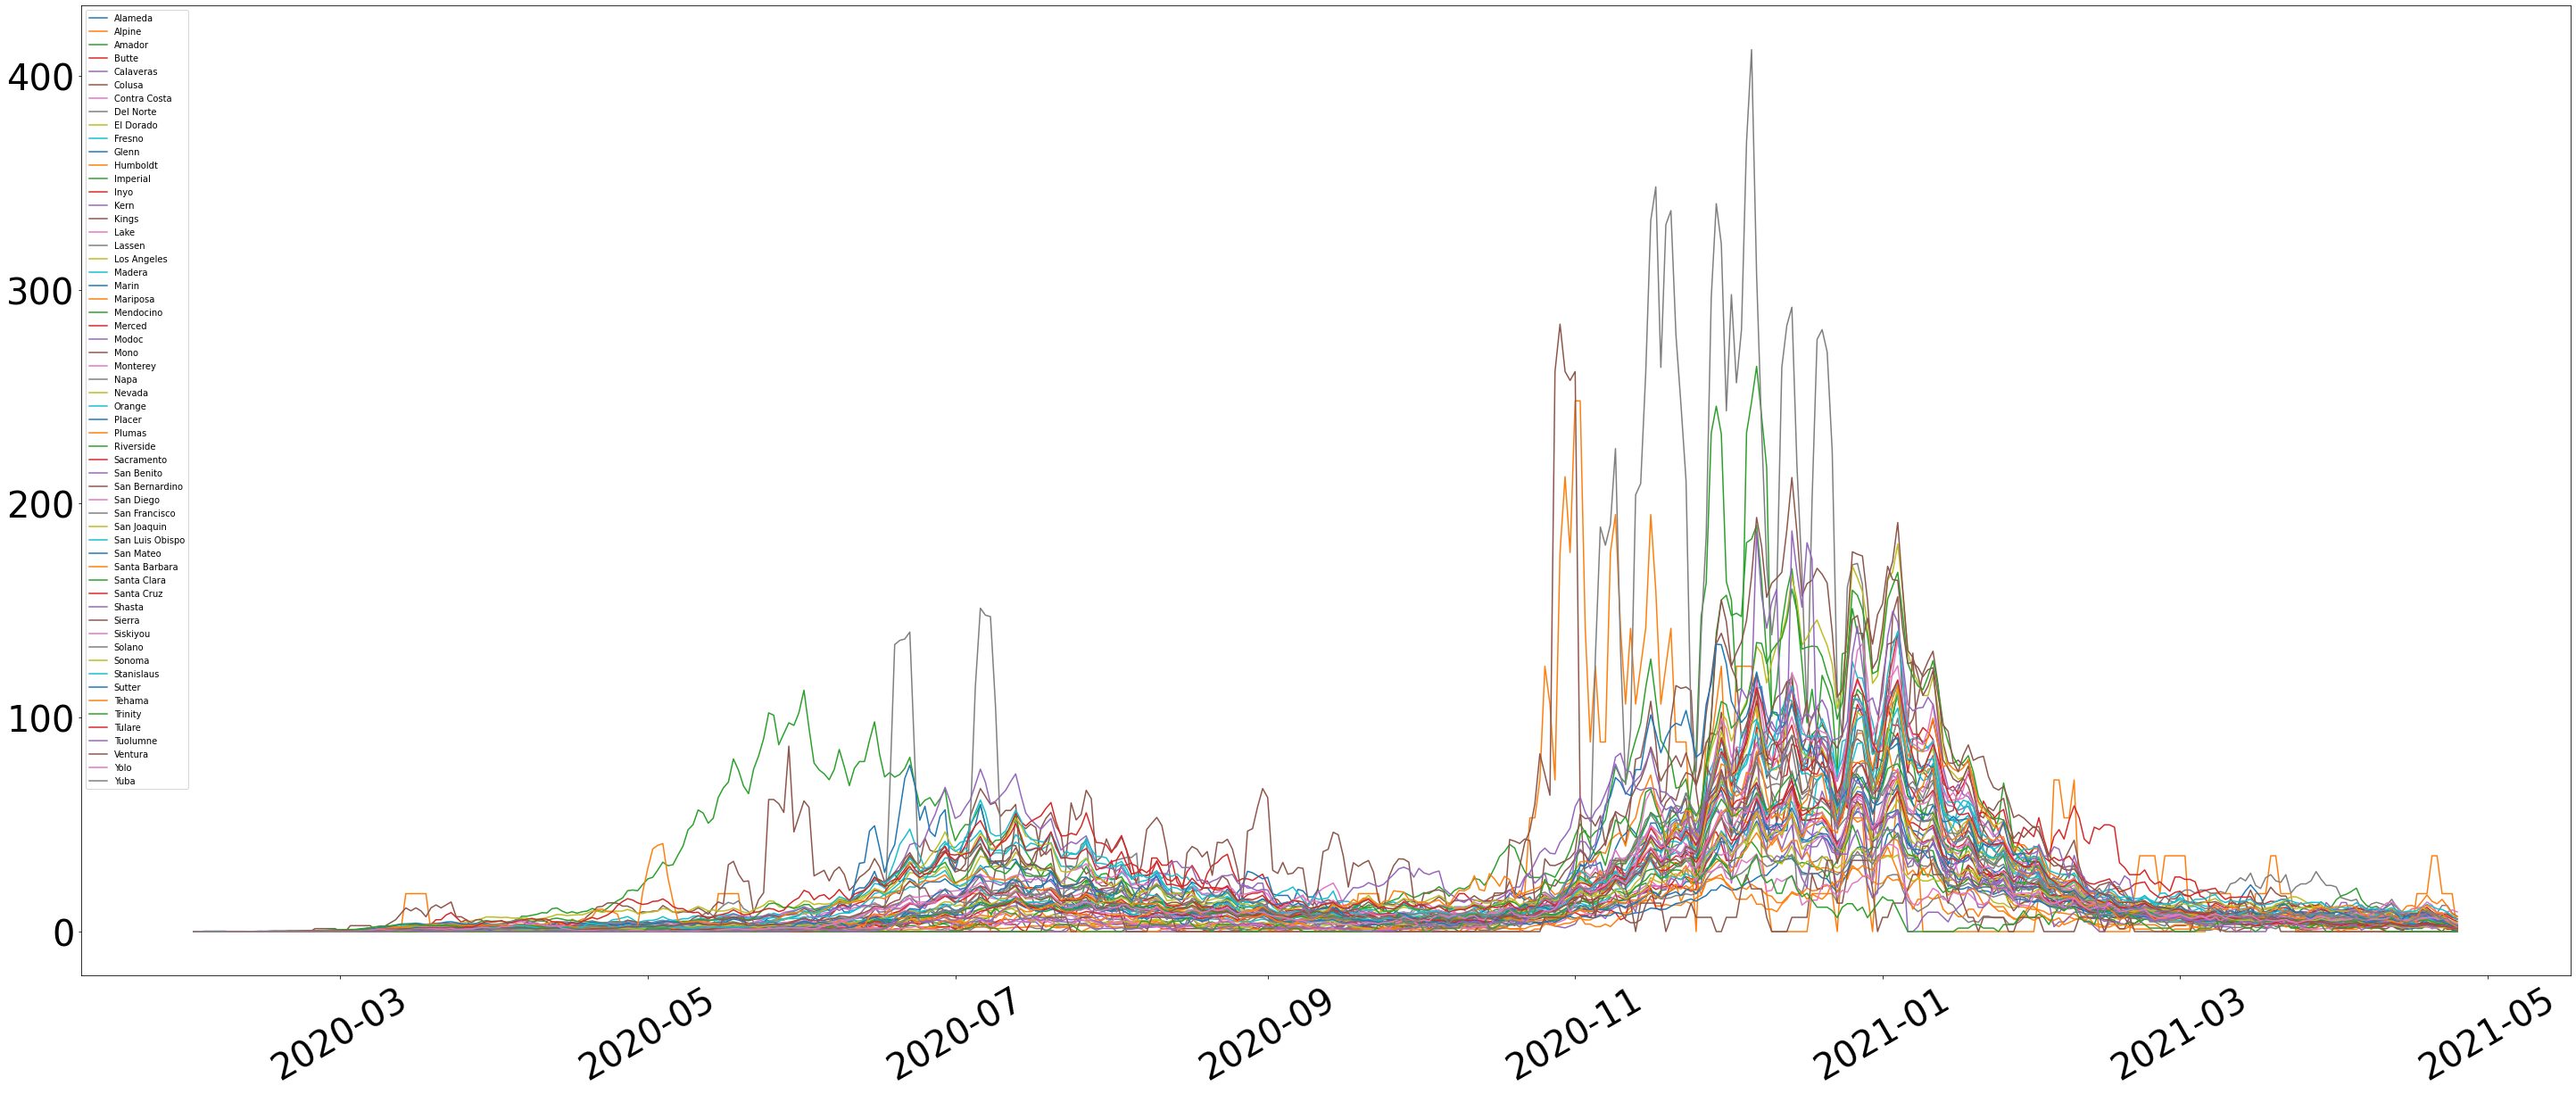

In [62]:
#//*** Merge Population Attributes with COVID County info
#//*** Only Merge if we haven't merged yet. I got 99 iPython problems but this aint one.
if "Latino" not in ca_covid_df.columns:
    ca_covid_df = pd.merge(ca_covid_df,pop_attrib_df,how="left",on=['county'])


#//*** Build per 100k Stats
ca_100k_df = ca_covid_df.copy()

#//*** Define Population Columns to convert to 100k. These Columns shouldn't change. Trying to setup a flexible
#//*** Systems where I can add other attributes later if needed
population_cols = [ 'population','Latino', 'White', 'Asian', 'Black', 'Native', 'Hawaiian','Multiracial' ]

#//*** Convert Popultion values to 100k units. ie divide by 100,000
for col in population_cols:
    ca_100k_df[col] = ca_100k_df[col]/100000



#//*** Convert cases, deaths, test to per 100k units
attrib_cols = ['date','county']

#//*** Ignore values in attrib_cols, and population_cols
#//*** Convert remianing attributes to values per 100,000.
#//*** This method makes it easier to change the 100k attributes later.
for col in ca_100k_df.columns:
    if col not in attrib_cols and col not in population_cols:
        #//*** Convert column to per 100k value. Which is Columns value divided population per 100k
        ca_100k_df[col] = ca_100k_df[col]/ca_100k_df['population'] 


#//*** Check our Work.
#//*** Cases per 100k should be relatively similar in values.
display_size = 40
fig,ax = plt.subplots()

for county in ca_100k_df['county'].unique():
    
    loop_df = ca_100k_df[ca_100k_df['county'] ==  county]
    ax.plot(loop_df['date'],loop_df['cases'].rolling(5).mean(),label=county)


    plt.xticks(rotation=30,fontsize=display_size)
    plt.yticks(fontsize=display_size)
handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*.25,loc='upper left')
#plt.title(f"Total Covid cases Time Series for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
#plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()



In [13]:
#//*************************************
#//*** Cleanup Statewide COVID values
#//*************************************
if 'demographic_value' in ca_race_df.columns:
    ca_race_df.rename( columns= {'demographic_value':'race'}, inplace=True)

if 'total_cases' in ca_race_df.columns:
    ca_race_df.rename( columns= {'total_cases':'cases'}, inplace=True)

remove_cols = ['percent_cases','percent_deaths','percent_of_ca_population']

for col in remove_cols:
    if col in ca_race_df.columns:
        del ca_race_df[col]

In [14]:
#//***********************
#//*** Working Data Sets
#//****************************************
#//*** Statewide COVID cases by Ethnicity
#//****************************************
print(ca_race_df)

#//*** Daily COVID Cases per 100k population
print(ca_100k_df)

        race   cases  deaths report_date
3730  Native      33       3  2020-04-13
3731  Native      33       3  2020-04-14
3732  Native      32       3  2020-04-15
3733  Native      34       4  2020-04-16
3734  Native      38       4  2020-04-17
...      ...     ...     ...         ...
7163   White  587420   18501  2021-04-25
7164   White  587870   18502  2021-04-26
7165   White  588338   18491  2021-04-27
7166   White  588878   18521  2021-04-28
7167   White  589492   18553  2021-04-29

[3438 rows x 4 columns]
            date     county  cases  deaths  total_tests  population   Latino  \
0     2021-04-29    Alameda    0.0     0.0     0.000000    16.71329  3.73055   
1     2021-04-29     Alpine    0.0     0.0     0.000000     0.01129  0.00139   
2     2021-04-29     Amador    0.0     0.0     0.000000     0.39752  0.05753   
3     2021-04-29      Butte    0.0     0.0     0.000000     2.19186  0.37731   
4     2021-04-29  Calaveras    0.0     0.0     0.000000     0.45905  0.05967   
...

In [15]:
#//*** Assigns a color from a palette list to a county. 
def assign_color(input_item, input_cd,input_palette):
    #//*** Check if item already exists, if so, return input_cd
    if input_item in input_cd.keys():
        return input_cd
    
    #//*** input_item needs a Color. Walk down the input_palette till one is not found
    for color in input_palette:
        if color not in input_cd.values():
            input_cd[input_item] = color
            return input_cd
    print("UH OH ran out of colors!!!")
    print(f"Item: {input_item}")
    print(input_cd)
    return input_cd

In [16]:
#//*** Color Choices: Tucking these aside for later use
#//*** Combine these with a dictionary to create color continuity across multiple visualizations.
color_palette = ["#c6eaff","#caa669","#14bae2","#f7cd89","#98a9e7","#e2ffb7","#cb9ec2","#77dcb5","#ffc5b7","#40bdba","#fff4b0","#74d0ff","#e4da8d","#7ceeff","#d0e195","#b7ab8c","#fcffdb","#83b88d","#ffe2c0","#abc37a"]
color_palette = ["#557788","#e12925","#44af0e","#7834c0","#726d00","#130c6d","#004e12","#f7007d","#017878","#950089","#00a3d7","#4b000e","#0063c2","#f07478","#013b75","#cf81b8","#212238","#af87e7","#320f49","#9c91db"]
county_color_palette = ["#b4a23b","#4457ca","#9ec535","#a651cb","#59ce59","#6a77f0","#52a325","#b93d9b","#36b25c","#e374d4","#c1c035","#7452af","#96ae3a","#a484e2","#89c466","#e54790","#57c888","#dd3d60","#5bd6c4","#dd4e2d","#45ccdf","#bd3738","#4cb998","#b13a6c","#368433","#588feb","#dcad3d","#4763af","#e49132","#4aa5d4","#c86321","#7695d3","#769233","#925898","#54701c","#c893d6","#3d7b44","#e084ac","#65a76b","#965179","#296437","#e57f5f","#31a8ad","#a44b2c","#368d71","#df7f81","#226a4d","#96465f","#b5b671","#68649c","#ad772e","#a34f52","#758348","#d8a06e","#505e25","#8e5e31","#8e8033","#695f1b"]
county_color_palette = ["#96465f","#dd3d60","#df7f81","#a34f52","#bd3738","#dd4e2d","#e57f5f","#a44b2c","#c86321","#8e5e31","#d8a06e","#e49132","#ad772e","#dcad3d","#b4a23b","#8e8033","#695f1b","#c1c035","#b5b671","#96ae3a","#505e25","#758348","#9ec535","#769233","#54701c","#52a325","#89c466","#368433","#59ce59","#3d7b44","#65a76b","#296437","#36b25c","#57c888","#226a4d","#368d71","#4cb998","#5bd6c4","#31a8ad","#45ccdf","#4aa5d4","#7695d3","#588feb","#4763af","#6a77f0","#4457ca","#68649c","#a484e2","#7452af","#a651cb","#c893d6","#925898","#e374d4","#b93d9b","#965179","#e084ac","#e54790","#b13a6c"]
county_color_palette = ["#226a4d","#31a8ad","#68649c","#758348","#505e25","#368d71","#4aa5d4","#965179","#7695d3","#45ccdf","#296437","#96465f","#8e5e31","#b5b671","#d8a06e","#a34f52","#5bd6c4","#695f1b","#4cb998","#df7f81","#3d7b44","#e084ac","#c893d6","#65a76b","#8e8033","#925898","#4763af","#54701c","#ad772e","#a44b2c","#e57f5f","#769233","#57c888","#b13a6c","#588feb","#a484e2","#b4a23b","#368433","#89c466","#7452af","#96ae3a","#dcad3d","#bd3738","#36b25c","#e374d4","#c86321","#b93d9b","#e49132","#dd3d60","#e54790","#c1c035","#4457ca","#6a77f0","#52a325","#9ec535","#dd4e2d","#a651cb","#59ce59"]

Index(['total_tests', 'population', 'Latino', 'White', 'Asian', 'Black',
       'Native', 'Hawaiian', 'Multiracial'],
      dtype='object')


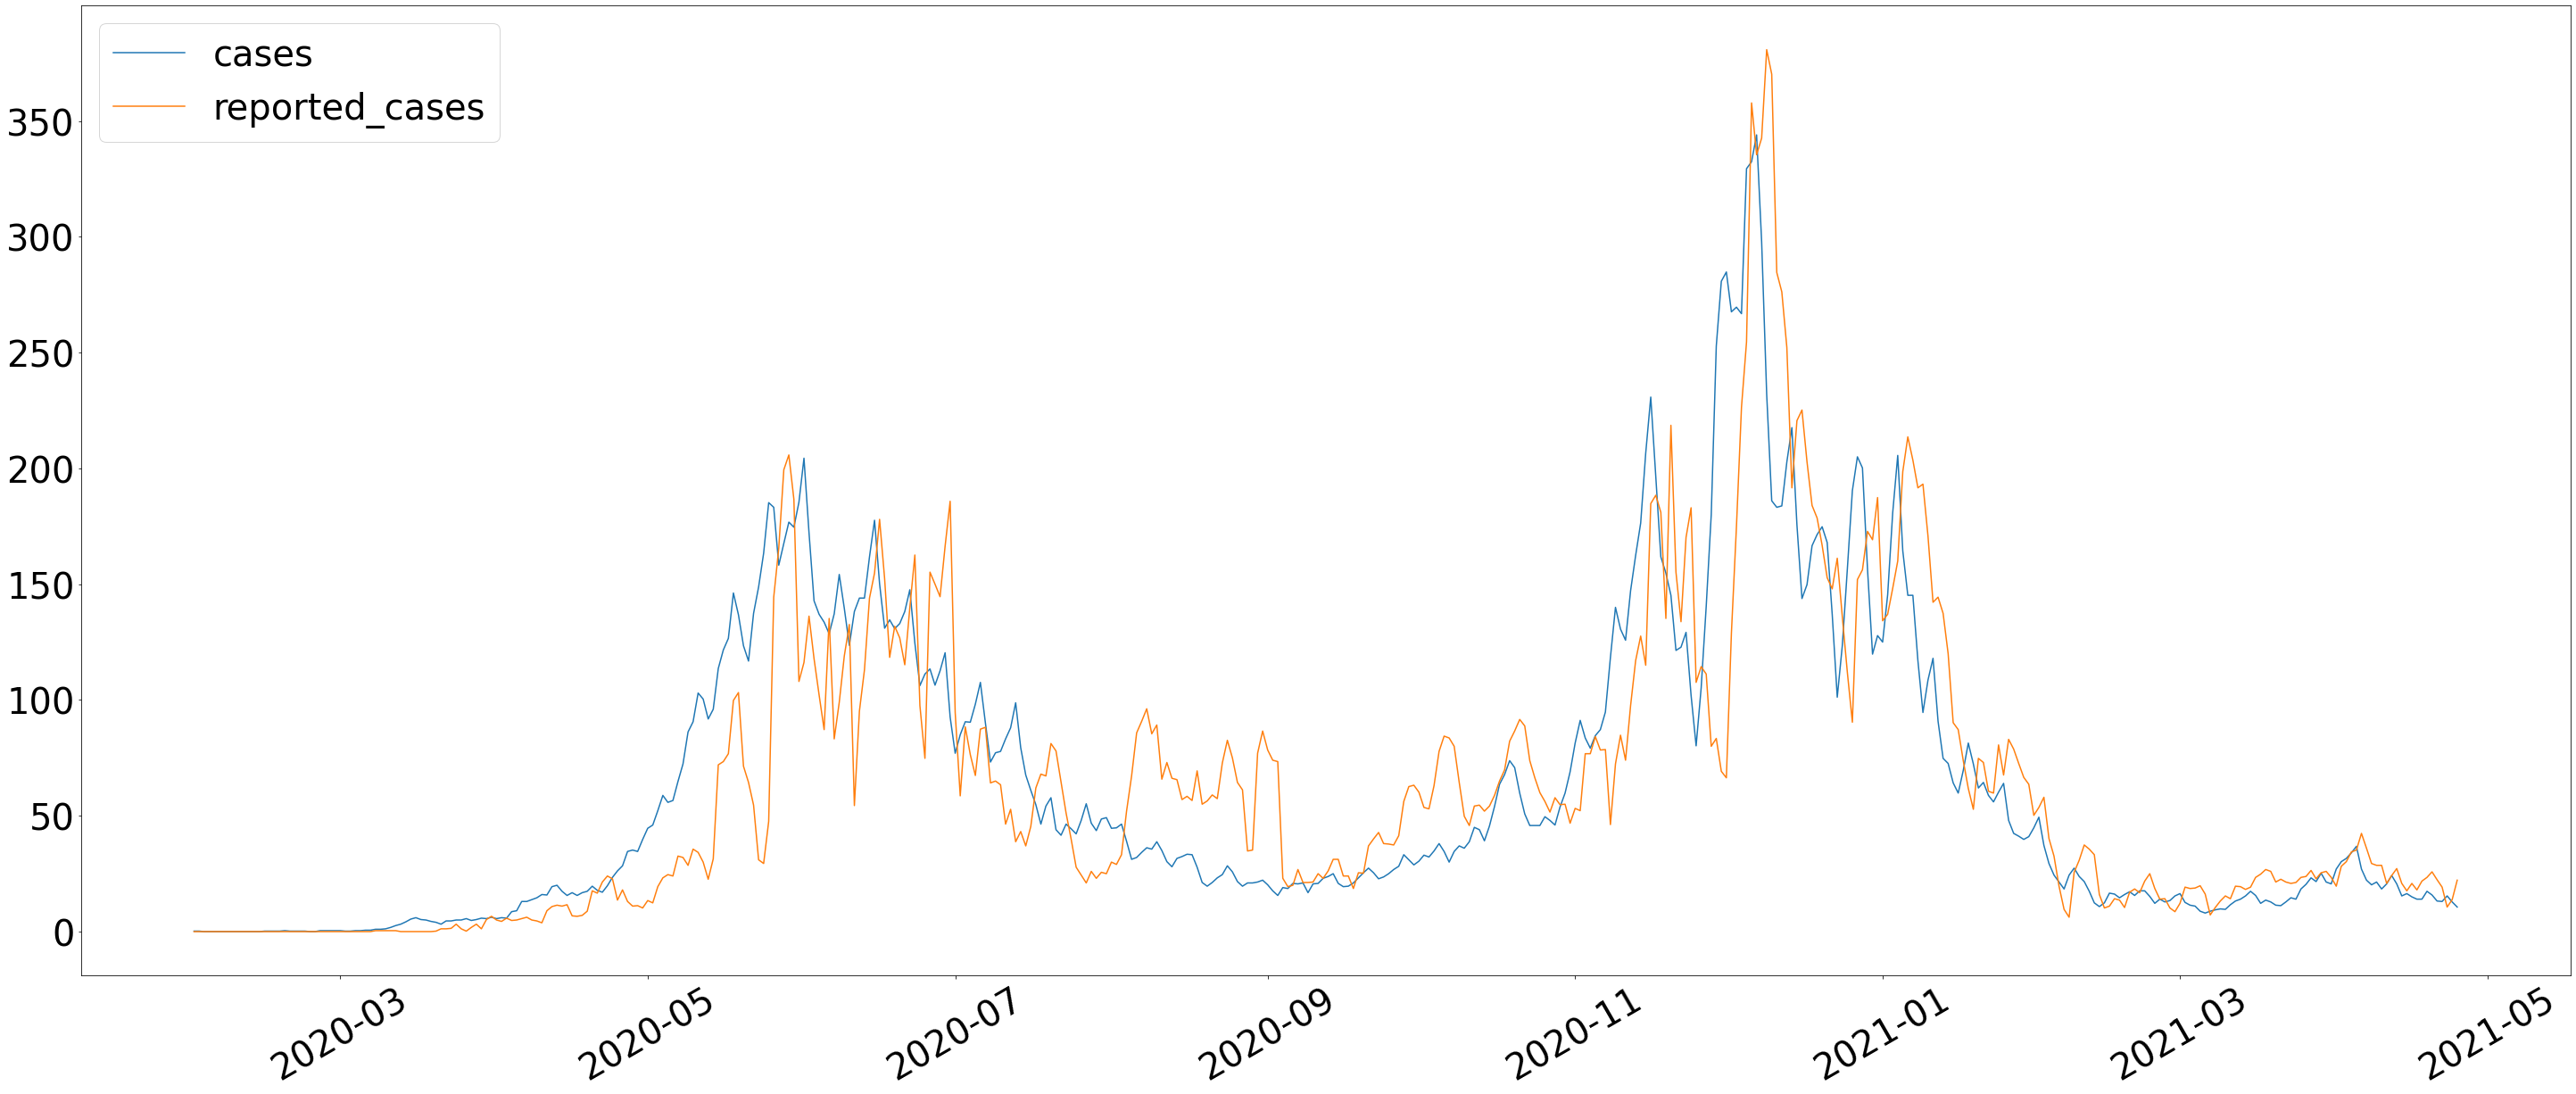

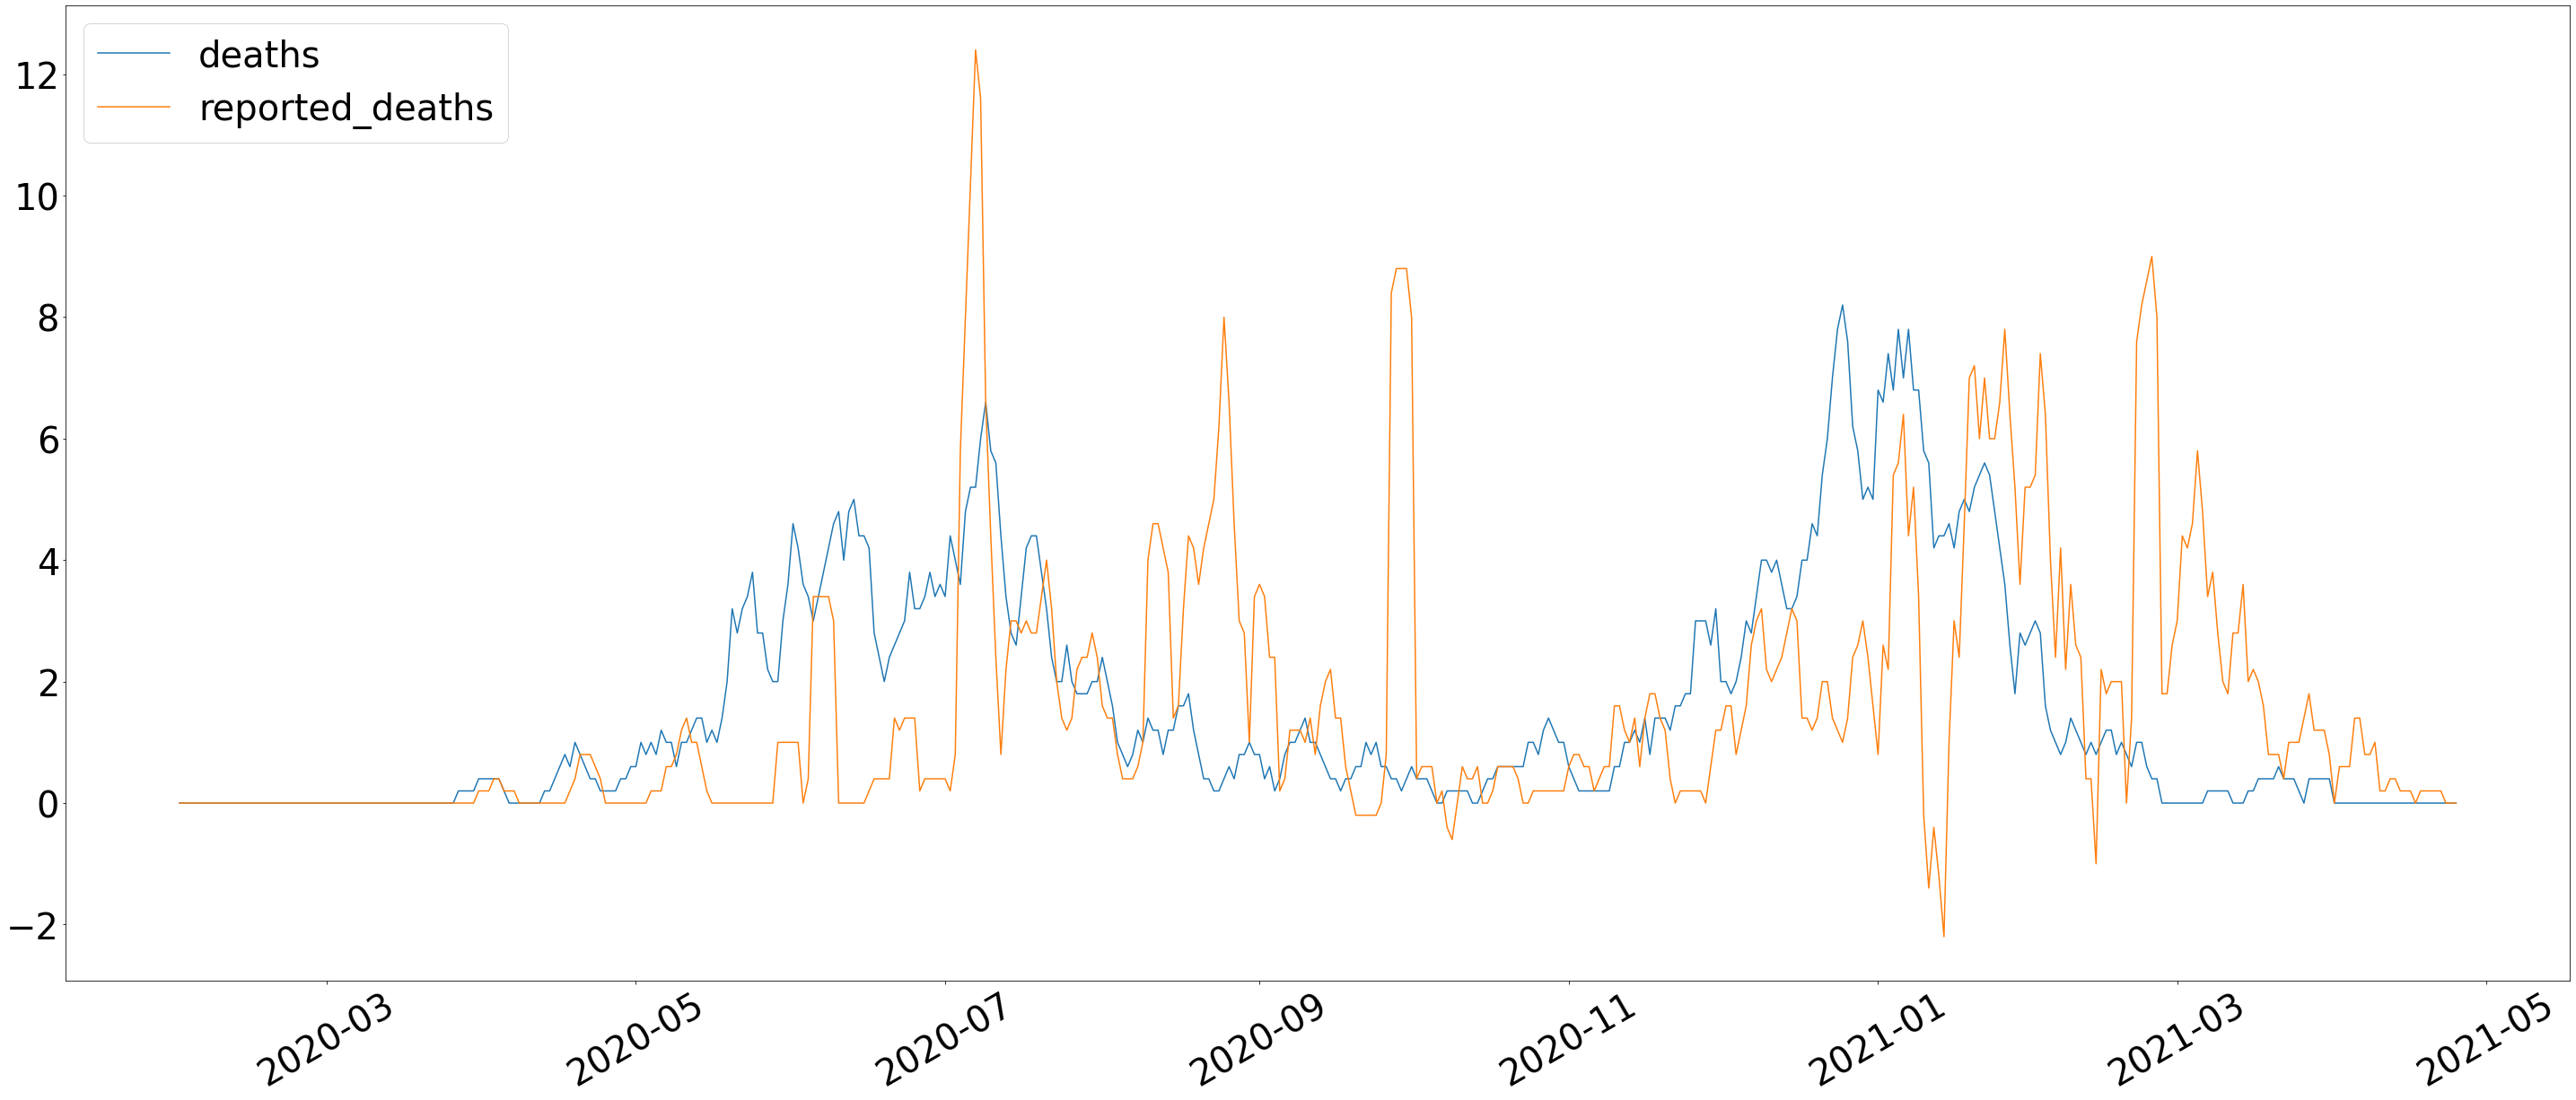

            date     county  cases  deaths  total_tests  population  Latino  \
0     2021-04-29    Alameda    0.0     0.0          0.0     1671329  373055   
1     2021-04-29     Alpine    0.0     0.0          0.0        1129     139   
2     2021-04-29     Amador    0.0     0.0          0.0       39752    5753   
3     2021-04-29      Butte    0.0     0.0          0.0      219186   37731   
4     2021-04-29  Calaveras    0.0     0.0          0.0       45905    5967   
...          ...        ...    ...     ...          ...         ...     ...   
26327 2020-02-01     Tulare    0.0     0.0          0.0      466195  305824   
26328 2020-02-01   Tuolumne    0.0     0.0          0.0       54478    6906   
26329 2020-02-01    Ventura    0.0     0.0          1.0      846006  365835   
26330 2020-02-01       Yolo    0.0     0.0          0.0      220500   70392   
26331 2020-02-01       Yuba    0.0     0.0          0.0       78668   22925   

        White   Asian   Black  Native  Hawaiian  Mu

In [17]:
#print(ca_covid_df[ca_covid_df['county']=='Imperial'])

print(ca_covid_df.columns[4:])
plt.rcParams['figure.figsize'] = [50,20]
plt.rcParams.update({'figure.max_open_warning': 0})



loop_df = ca_covid_orig_df[ca_covid_orig_df['county']=='Imperial']
display_size = 40
fig,ax = plt.subplots()

for col in ['cases','reported_cases']:

    
    ax.plot(loop_df['date'],loop_df[col].rolling(5).mean(),label=col)


    plt.xticks(rotation=30,fontsize=display_size)
    plt.yticks(fontsize=display_size)
handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size,loc='upper left')
#plt.title(f"Total Covid cases Time Series for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
#plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()
"""
for col in ca_covid_df.columns[4:]:
    display_size = 40
    fig,ax = plt.subplots()
    
    ax.plot(loop_df['date'],loop_df[col],label=col)


    plt.xticks(rotation=30,fontsize=display_size)
    plt.yticks(fontsize=display_size)
    handles,labels = deduplicate_legend(ax)
    plt.legend(fontsize=display_size,loc='upper left')
    #plt.title(f"Total Covid cases Time Series for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
    #plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
    plt.show()
"""
fig,ax = plt.subplots()
for col in ['deaths','reported_deaths']:

    
    ax.plot(loop_df['date'],loop_df[col].rolling(5).mean(),label=col)


    plt.xticks(rotation=30,fontsize=display_size)
    plt.yticks(fontsize=display_size)
handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size,loc='upper left')
#plt.title(f"Total Covid cases Time Series for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
#plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()
print(ca_covid_df)


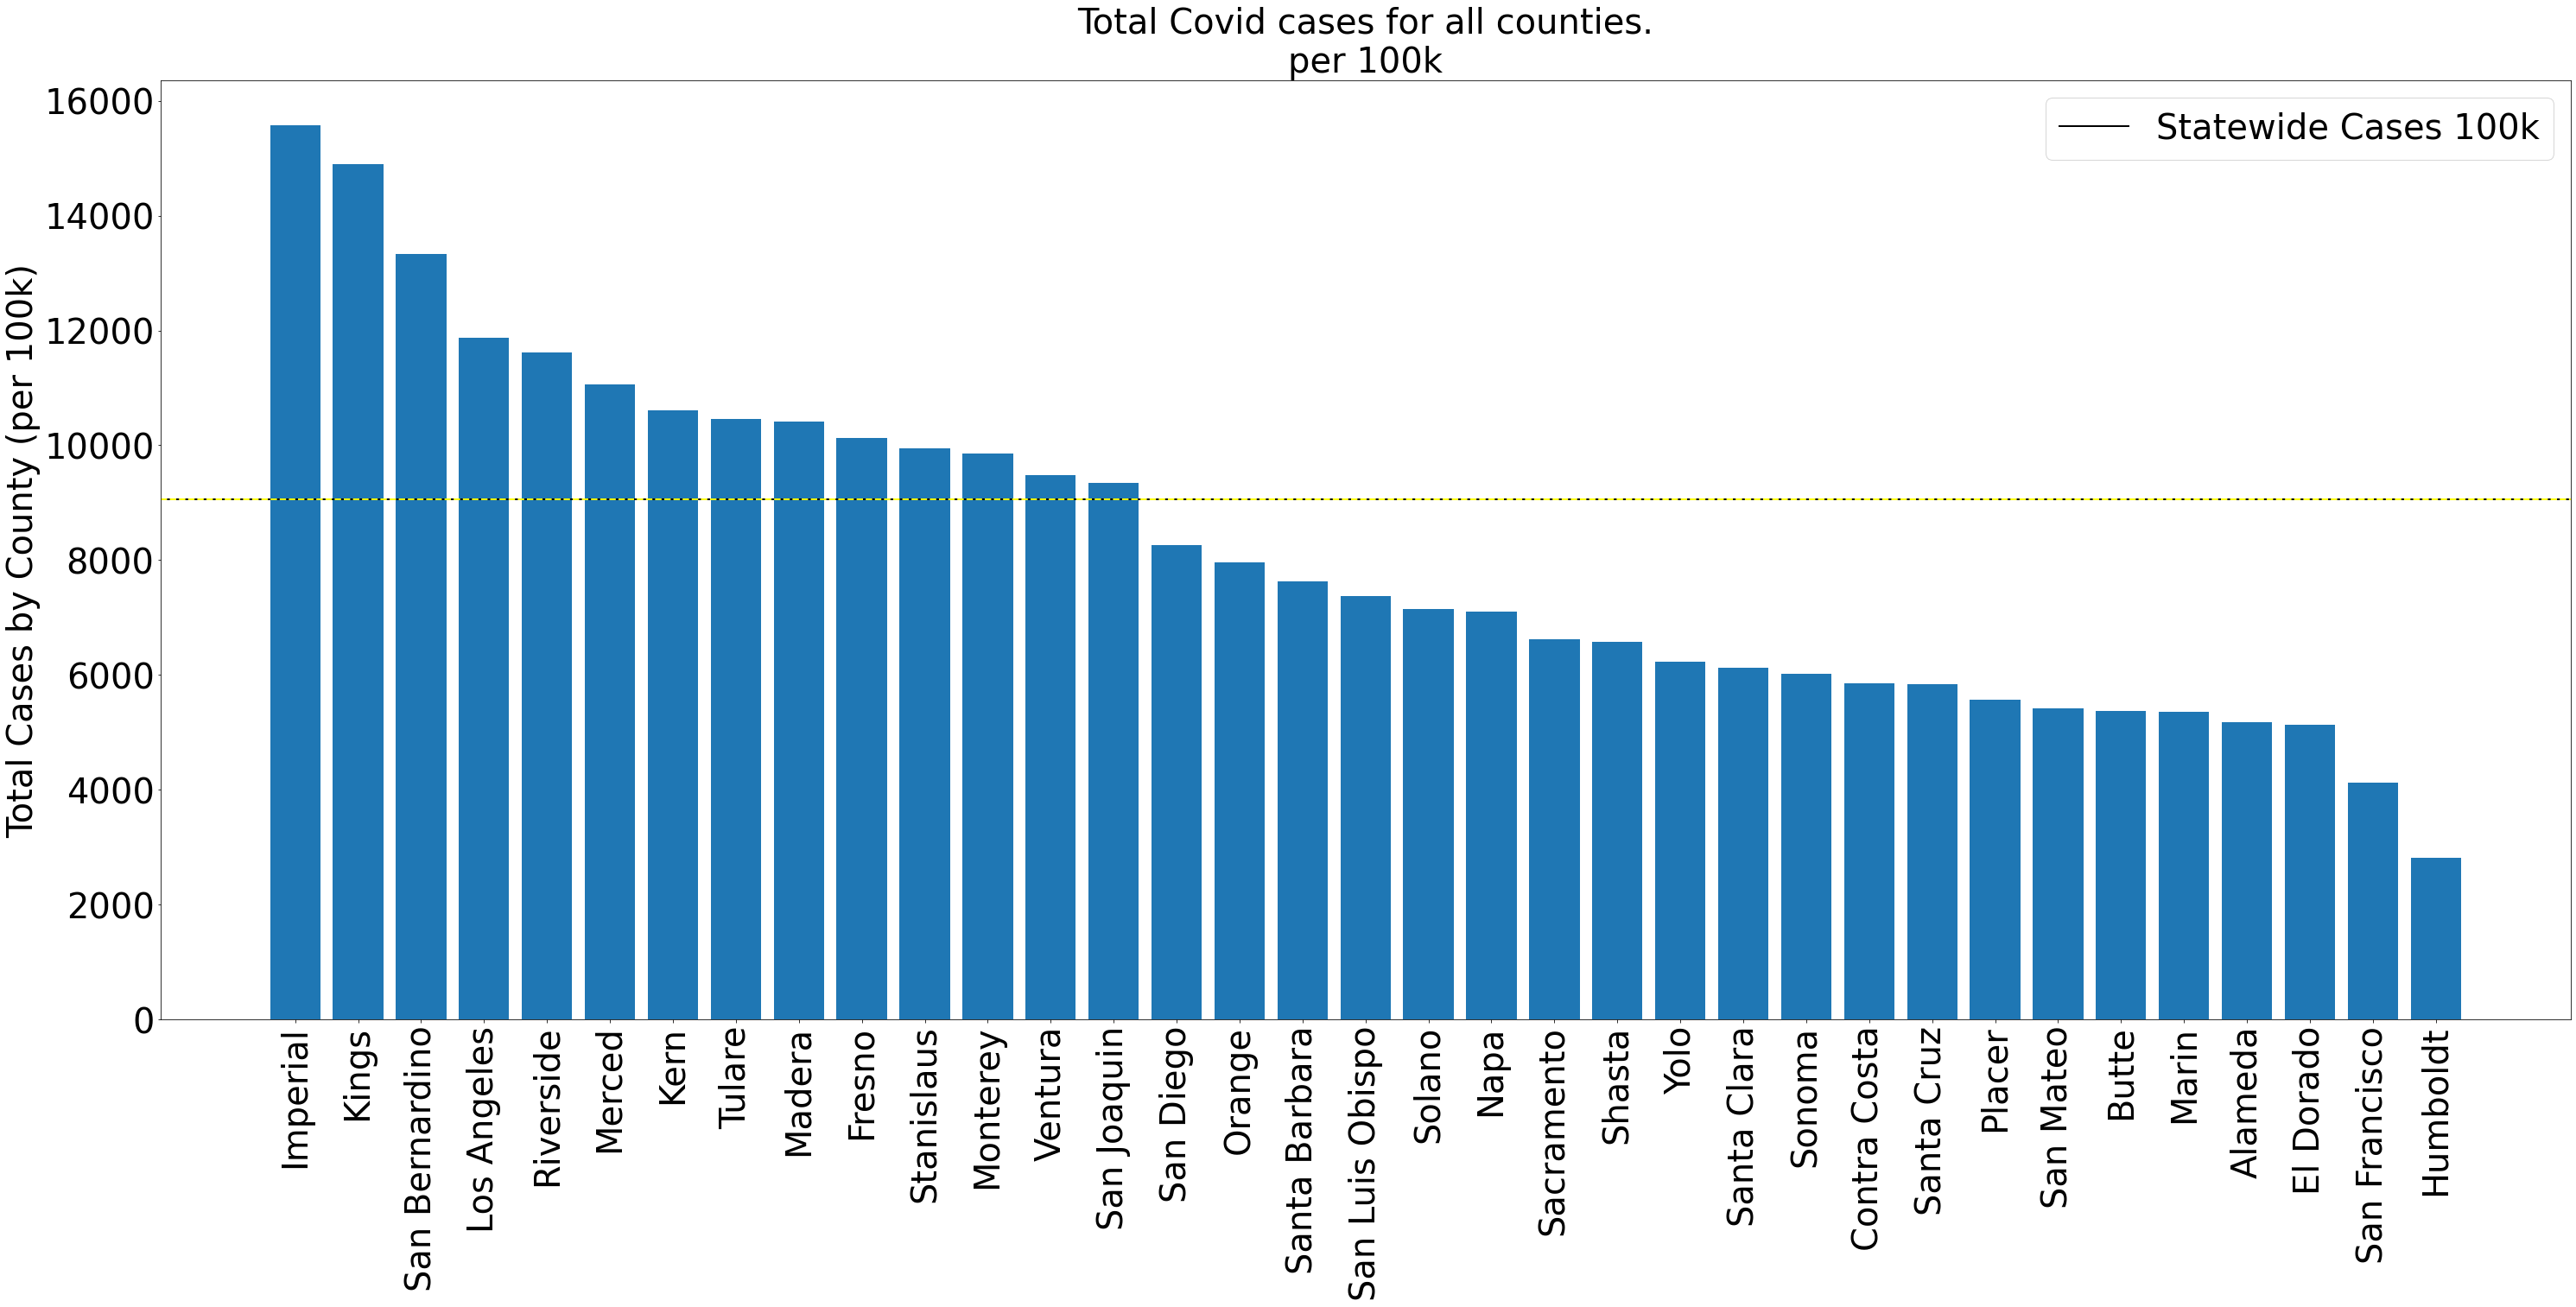

In [58]:
#//*** Get the Statewide 100k value. 
#//*** Get total Case Count from orig_df, dvided by total population / 100000
state_100k = ca_covid_orig_df['cases'].sum()/(ca_covid_orig_df['population'].unique().sum()/100000)

county_list = ca_100k_df['county'].unique()

county_100k = []

for county in county_list:
    if ca_100k_df[ca_100k_df['county']==county].iloc[0]['population'] > 1:
        county_100k.append(county)
case_totals = []

for county in county_100k:
    case_totals.append(ca_100k_df[ca_100k_df['county']==county]['cases'].sum())

#//*** Temp Series
ts = pd.Series(index = county_100k, data=case_totals).sort_values(ascending=False)

display_size = 40
fig,ax = plt.subplots()

ax.bar(ts.index,ts)

#//*** Draw horizontal line. Draw it twice to get the yellow and back effect. 
#//*** This technique looks viusually good, but I can't get the legend to draw approrpriately.
ax.axhline(state_100k,color = "black", label="Statewide Cases 100k", linestyle = "-", lw=2)
ax.axhline(state_100k,color = "yellow", linestyle = "--", lw=2)
        
plt.xticks(rotation=90,fontsize=display_size)
plt.yticks(fontsize=display_size)

#handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size,loc='upper right')
plt.title(f"Total Covid cases for all counties.\nper 100k",fontsize=display_size)
plt.ylabel("Total Cases by County (per 100k)",fontsize=display_size)
plt.show()

In [23]:
#//*** Look at total County COVID numbers by county rates per 100k.


#//*** Get the last data


for county in






#last_day_df = rd[race_list[0]][rd[race_list[0]]['date'] == last_date]

            date     county area_type  population  cases  deaths  total_tests  \
0     2021-04-29    Alameda    County   1685886.0    0.0     0.0          0.0   
1     2021-04-29     Alpine    County      1117.0    0.0     0.0          0.0   
2     2021-04-29     Amador    County     38531.0    0.0     0.0          0.0   
3     2021-04-29      Butte    County    217769.0    0.0     0.0          0.0   
4     2021-04-29  Calaveras    County     44289.0    0.0     0.0          0.0   
...          ...        ...       ...         ...    ...     ...          ...   
27688 2020-02-01     Tulare    County    484423.0    0.0     0.0          0.0   
27689 2020-02-01   Tuolumne    County     52351.0    0.0     0.0          0.0   
27691 2020-02-01    Ventura    County    852747.0    0.0     0.0          1.0   
27692 2020-02-01       Yolo    County    223612.0    0.0     0.0          0.0   
27693 2020-02-01       Yuba    County     79290.0    0.0     0.0          0.0   

       positive_tests  repo

KeyError: 'cty_confirmed'